In [1]:

pip install labelme opencv-python matplotlib albumentations

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import time
import uuid #uniform unique identifier
import cv2

In [3]:
uuid.uuid1()

UUID('af7a5f23-219d-11ee-9e44-18473d2e8d44')

In [4]:
path1 = "C:/Users/MEET/"
IMAGES_PATH = os.path.join(path1,"ML_DL_PROJECTS","facedetection",'data','images')
number_images = 30
print(IMAGES_PATH)

C:/Users/MEET/ML_DL_PROJECTS\facedetection\data\images


In [5]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [6]:
!labelme

   QT_AUTO_SCREEN_SCALE_FACTOR to enable platform plugin controlled per-screen factors.
   QT_SCREEN_SCALE_FACTORS to set per-screen DPI.
   QT_SCALE_FACTOR to set the application global scale factor.


In [7]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [8]:
tf.config.list_physical_devices('GPU')

[]

In [9]:
images = tf.data.Dataset.list_files('C:\\Users\\MEET\\ML_DL_PROJECTS\\facedetection\\data\\images\\*.jpg', shuffle=False)

In [10]:
images.as_numpy_iterator().next()

b'C:\\Users\\MEET\\ML_DL_PROJECTS\\facedetection\\data\\images\\b2ab8bd6-219d-11ee-955e-18473d2e8d44.jpg'

In [11]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [12]:
images = images.map(load_image)

In [13]:
images.as_numpy_iterator().next()

array([[[234, 250, 247],
        [234, 250, 247],
        [232, 251, 247],
        ...,
        [ 66,  71,  30],
        [ 77,  80,  35],
        [ 73,  76,  29]],

       [[234, 250, 247],
        [234, 250, 247],
        [231, 250, 246],
        ...,
        [ 72,  77,  37],
        [ 76,  79,  36],
        [ 69,  72,  27]],

       [[233, 249, 246],
        [233, 249, 246],
        [231, 250, 244],
        ...,
        [ 72,  76,  41],
        [ 79,  81,  44],
        [ 80,  82,  43]],

       ...,

       [[ 25,  26,  12],
        [ 27,  28,  14],
        [ 30,  31,  17],
        ...,
        [ 35,  35,   0],
        [ 37,  37,   1],
        [ 40,  40,   4]],

       [[ 27,  28,  12],
        [ 28,  29,  13],
        [ 30,  31,  15],
        ...,
        [ 34,  34,   0],
        [ 38,  35,   0],
        [ 40,  37,   2]],

       [[ 27,  28,  12],
        [ 28,  29,  13],
        [ 30,  31,  15],
        ...,
        [ 32,  32,   0],
        [ 36,  33,   0],
        [ 36,  33,   0]]

In [14]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [15]:
image_generator = images.batch(4).as_numpy_iterator()

In [16]:
plot_images = image_generator.next()

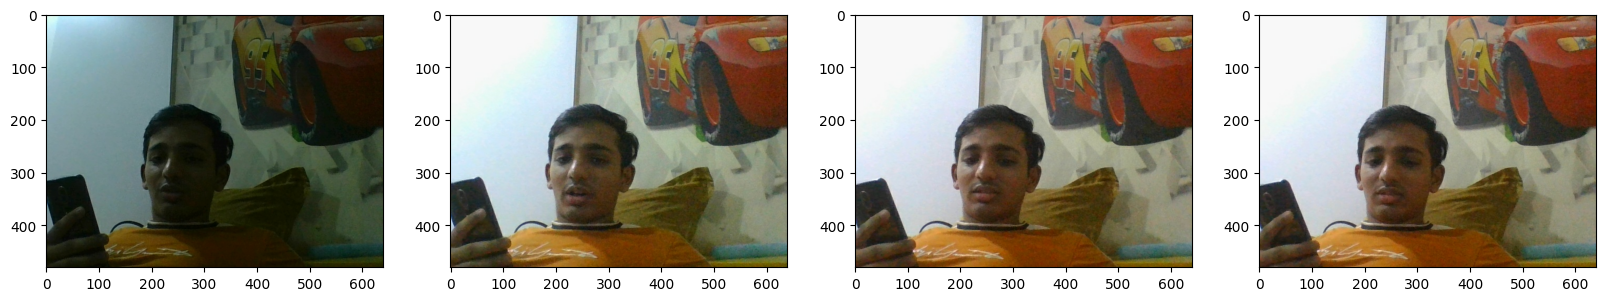

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [18]:
#Splitting of data

#63 images to train
#14 images to test
#13 images to val


In [19]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join(path1,"ML_DL_PROJECTS","facedetection",'data', folder,'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join(path1,"ML_DL_PROJECTS","facedetection",'data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join(path1,"ML_DL_PROJECTS","facedetection",'data', folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [20]:
import albumentations as alb

In [21]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

In [22]:
img = cv2.imread(os.path.join(path1,"ML_DL_PROJECTS","facedetection",'data','train','images','ff63616e-1e5b-11ee-bef2-18473d2e8d44.jpg'))

In [23]:
img

array([[[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [ 49,  51,  52],
        [ 42,  44,  44],
        [ 37,  39,  39]],

       [[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [ 47,  49,  49],
        [ 42,  44,  44],
        [ 40,  42,  42]],

       [[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [ 48,  51,  49],
        [ 46,  49,  47],
        [ 46,  49,  47]],

       ...,

       [[175, 184, 163],
        [176, 185, 164],
        [176, 185, 164],
        ...,
        [ 61,  61,  61],
        [ 63,  61,  60],
        [ 63,  61,  60]],

       [[178, 185, 164],
        [178, 185, 164],
        [178, 186, 163],
        ...,
        [ 66,  64,  64],
        [ 65,  60,  61],
        [ 64,  59,  60]],

       [[178, 185, 164],
        [177, 184, 163],
        [177, 185, 162],
        ...,
        [ 61,  59,  59],
        [ 57,  52,  53],
        [ 55,  50,  51]]

In [24]:
with open(os.path.join(path1,"ML_DL_PROJECTS","facedetection",'data','train','labels', 'ff63616e-1e5b-11ee-bef2-18473d2e8d44.json'), 'r') as f:
    label = json.load(f)

In [25]:
label['shapes'][0]['points']

[[137.17948717948718, 132.3076923076923],
 [304.87179487179486, 343.5897435897436]]

In [26]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]


In [27]:
coords

[137.17948717948718, 132.3076923076923, 304.87179487179486, 343.5897435897436]

In [28]:
coords = list(np.divide(coords, [640,480,640,480]))

In [29]:
coords

[0.21434294871794873,
 0.2756410256410256,
 0.47636217948717946,
 0.7158119658119658]

In [30]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [31]:
augmented

{'image': array([[[ 66,  69,  60],
         [ 68,  71,  62],
         [ 67,  70,  61],
         ...,
         [ 97, 126, 131],
         [100, 129, 133],
         [101, 130, 134]],
 
        [[ 67,  70,  61],
         [ 68,  71,  62],
         [ 65,  68,  59],
         ...,
         [ 99, 128, 133],
         [102, 131, 135],
         [103, 132, 136]],
 
        [[ 71,  76,  67],
         [ 69,  74,  65],
         [ 65,  70,  61],
         ...,
         [103, 129, 135],
         [104, 133, 138],
         [104, 133, 138]],
 
        ...,
 
        [[ 52,  59,  52],
         [ 53,  60,  53],
         [ 58,  65,  58],
         ...,
         [248, 248, 248],
         [248, 248, 248],
         [248, 248, 248]],
 
        [[ 58,  65,  58],
         [ 61,  68,  61],
         [ 59,  66,  59],
         ...,
         [248, 248, 248],
         [248, 248, 248],
         [248, 248, 248]],
 
        [[ 58,  65,  58],
         [ 60,  67,  60],
         [ 59,  66,  59],
         ...,
         [248, 248,

In [32]:
augmented['bboxes'][0][2:]

(0.9129344729344729, 0.7548717948717949)

In [33]:
augmented['bboxes']

[(0.5402849002849003,
  0.2853561253561253,
  0.9129344729344729,
  0.7548717948717949)]

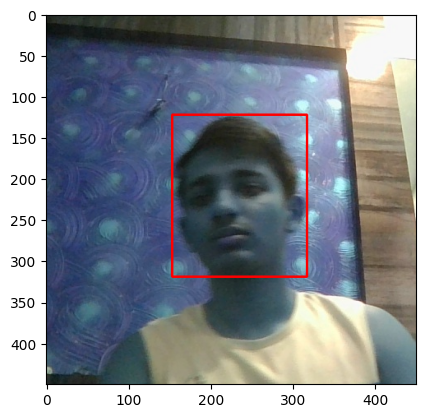

In [72]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [73]:
for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join(path1, "ML_DL_PROJECTS", "facedetection", "data", partition, "images")):
        img = cv2.imread(os.path.join(path1, "ML_DL_PROJECTS", "facedetection", "data", partition, "images", image))

        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join(path1, "ML_DL_PROJECTS", "facedetection", "data", partition, "labels", f"{image.split('.')[0]}.json")
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                label = json.load(f)

            shapes = label.get('shapes', [])
            if shapes:
                points = shapes[0].get('points', [])
                if points and len(points) > 1:
                    coords[0] = points[0][0]
                    coords[1] = points[0][1]
                    coords[2] = points[1][0]
                    coords[3] = points[1][1]
                    coords = list(np.divide(coords, [640, 480, 640, 480]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join(path1, "ML_DL_PROJECTS", "facedetection", "aug_data", partition, "images", f"{image.split('.')[0]}.{x}.jpg"), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                with open(os.path.join(path1, "ML_DL_PROJECTS", "facedetection", "aug_data", partition, "labels", f"{image.split('.')[0]}.{x}.json"), "w") as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)


x_max is less than or equal to x_min for bbox [0.20083841463414637, 0.11636178861788622, 0.010289634146341528, 0.7057926829268293, 'face'].
x_max is less than or equal to x_min for bbox [0.2808689024390244, 0.11128048780487809, 0.0064786585365854315, 0.7057926829268293, 'face'].
x_max is less than or equal to x_min for bbox [0.26943597560975613, 0.09603658536585372, 0.010289634146341528, 0.7413617886178862, 'face'].
image must be numpy array type
x_max is less than or equal to x_min for bbox [0.21227134146341467, 0.1316056910569106, 0.002667682926829333, 0.7159552845528456, 'face'].


In [74]:
print(label['shapes'])

[{'label': 'face', 'points': [[317.1794871794872, 141.53846153846152], [481.7948717948718, 338.4615384615385]], 'group_id': None, 'description': '', 'shape_type': 'rectangle', 'flags': {}}]


In [75]:
train_images = tf.data.Dataset.list_files('C:\\Users\\MEET\\ML_DL_PROJECTS\\facedetection\\aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [76]:
test_images = tf.data.Dataset.list_files('C:\\Users\\MEET\\ML_DL_PROJECTS\\facedetection\\aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [77]:
val_images = tf.data.Dataset.list_files('C:\\Users\\MEET\\ML_DL_PROJECTS\\facedetection\\aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [92]:
train_images.as_numpy_iterator().next()

array([[[0.44797793, 0.515625  , 0.51415443],
        [0.45655638, 0.5183211 , 0.5188113 ],
        [0.4715686 , 0.5147059 , 0.5254902 ],
        ...,
        [0.6691176 , 0.7245098 , 0.69264704],
        [0.66697305, 0.72536767, 0.70165443],
        [0.65275735, 0.719424  , 0.6947917 ]],

       [[0.44264707, 0.49234068, 0.49479166],
        [0.44307598, 0.51280636, 0.52205884],
        [0.4464461 , 0.49944854, 0.5219976 ],
        ...,
        [0.65539217, 0.73382354, 0.6867647 ],
        [0.6670956 , 0.7308211 , 0.6863358 ],
        [0.66378677, 0.728125  , 0.68762255]],

       [[0.43223038, 0.4930147 , 0.5201593 ],
        [0.42653185, 0.5101716 , 0.5293505 ],
        [0.4401348 , 0.5216299 , 0.5416667 ],
        ...,
        [0.6691789 , 0.7476103 , 0.704473  ],
        [0.6813725 , 0.74460787, 0.7053922 ],
        [0.6900123 , 0.74099267, 0.7106005 ]],

       ...,

       [[0.18131128, 0.19552696, 0.14503677],
        [0.18927696, 0.21378677, 0.16721813],
        [0.15729167, 0

In [93]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [94]:
train_labels = tf.data.Dataset.list_files('C:\\Users\\MEET\\ML_DL_PROJECTS\\facedetection\\aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))


In [95]:
test_labels = tf.data.Dataset.list_files('C:\\Users\\MEET\\ML_DL_PROJECTS\\facedetection\\aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))


In [96]:
val_labels = tf.data.Dataset.list_files('C:\\Users\\MEET\\ML_DL_PROJECTS\\facedetection\\aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))


In [97]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.    , 0.2255, 0.3916, 0.697 ], dtype=float16))

In [98]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)


(3660, 3660, 780, 780, 720, 720)

In [99]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [100]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [101]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [102]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.07056, 0.2474 , 0.4717 , 0.7188 ],
        [0.399  , 0.2465 , 0.8975 , 0.826  ],
        [0.     , 0.1791 , 0.456  , 0.797  ],
        [0.2037 , 0.10455, 0.583  , 0.522  ],
        [0.0709 , 0.094  , 0.64   , 0.75   ],
        [0.7427 , 0.2537 , 1.     , 0.917  ],
        [0.0465 , 0.2502 , 0.6157 , 0.9062 ],
        [0.44   , 0.1906 , 0.8457 , 0.709  ]], dtype=float16))

In [103]:
data_samples = train.as_numpy_iterator()

In [104]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


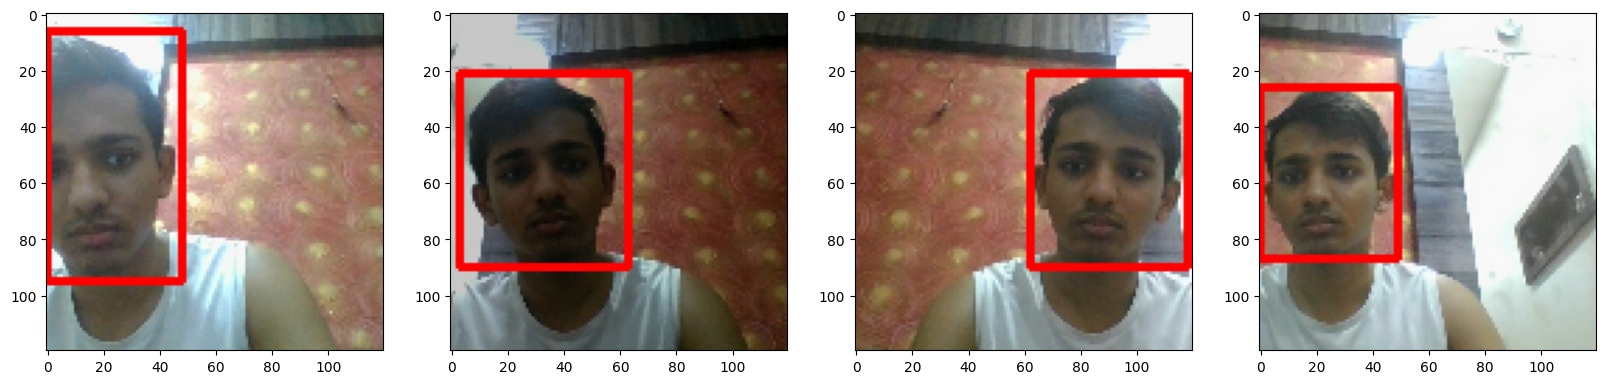

In [105]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [106]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [108]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 5s 0us/step


In [109]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [110]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [111]:
facetracker = build_model()

In [112]:
facetracker.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_3[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [113]:
X, y = train.as_numpy_iterator().next()

In [114]:
X.shape

(8, 120, 120, 3)

In [115]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 4s 4s/step


In [116]:
classes, coords

(array([[0.5294439 ],
        [0.6497784 ],
        [0.66154474],
        [0.5884826 ],
        [0.621798  ],
        [0.6830254 ],
        [0.65178186],
        [0.67001593]], dtype=float32),
 array([[0.6839888 , 0.6366915 , 0.38288835, 0.5627455 ],
        [0.6204702 , 0.69185823, 0.3896357 , 0.5095247 ],
        [0.6900218 , 0.5941174 , 0.38783377, 0.462774  ],
        [0.61668396, 0.59079623, 0.42936593, 0.5347704 ],
        [0.6858711 , 0.64590186, 0.43379602, 0.53938377],
        [0.75635725, 0.5735519 , 0.33517724, 0.40428957],
        [0.68535346, 0.5915997 , 0.43402883, 0.4831599 ],
        [0.6822259 , 0.5757637 , 0.39657858, 0.5260077 ]], dtype=float32))

In [117]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [119]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [120]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [121]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [122]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=10.115332>

In [123]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5240606>

In [124]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=10.115332>

In [125]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [126]:
model = FaceTracker(facetracker)


In [127]:
model.compile(opt, classloss, regressloss)

In [128]:
logdir='logs'

In [129]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [130]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
458/458 [==============================] - 1245s 3s/step - total_loss: 0.3662 - class_loss: 0.1042 - regress_loss: 0.3141 - val_total_loss: 0.1044 - val_class_loss: 0.0311 - val_regress_loss: 0.0889
Epoch 2/10
458/458 [==============================] - 1248s 3s/step - total_loss: 0.0809 - class_loss: 0.0285 - regress_loss: 0.0667 - val_total_loss: 1.6525 - val_class_loss: 1.3293 - val_regress_loss: 0.9878
Epoch 3/10
458/458 [==============================] - 1066s 2s/step - total_loss: 0.0549 - class_loss: 0.0208 - regress_loss: 0.0445 - val_total_loss: 0.6982 - val_class_loss: 0.5111 - val_regress_loss: 0.4426
Epoch 4/10
458/458 [==============================] - 1114s 2s/step - total_loss: 0.0284 - class_loss: 0.0088 - regress_loss: 0.0241 - val_total_loss: 1.9484 - val_class_loss: 1.2394 - val_regress_loss: 1.3288
Epoch 5/10
458/458 [==============================] - 1031s 2s/step - total_loss: 0.0211 - class_loss: 0.0067 - regress_loss: 0.0177 - val_total_loss: 0.5954 - 

In [131]:
hist.history

{'total_loss': [0.030636705458164215,
  0.017089713364839554,
  0.012599971145391464,
  0.014136277139186859,
  0.0023791687563061714,
  0.003729436779394746,
  0.2571665346622467,
  0.004379101563245058,
  0.002592906355857849,
  0.0038278410211205482],
 'class_loss': [0.012812554836273193,
  2.8134714739280753e-05,
  0.003392772050574422,
  2.275490442116279e-05,
  1.168259132100502e-05,
  0.00013761357695329934,
  0.30679795145988464,
  5.0383230700390413e-05,
  5.871092980669346e-06,
  0.00026168962358497083],
 'regress_loss': [0.02423042804002762,
  0.01707564666867256,
  0.010903584770858288,
  0.014124900102615356,
  0.002373327501118183,
  0.0036606299690902233,
  0.10376755893230438,
  0.004353909753262997,
  0.002589970827102661,
  0.0036969962529838085],
 'val_total_loss': [0.10444091260433197,
  1.652480959892273,
  0.698180615901947,
  1.9484367370605469,
  0.5954444408416748,
  2.6466448307037354,
  0.6538683772087097,
  0.2518645226955414,
  1.133716344833374,
  1.894554

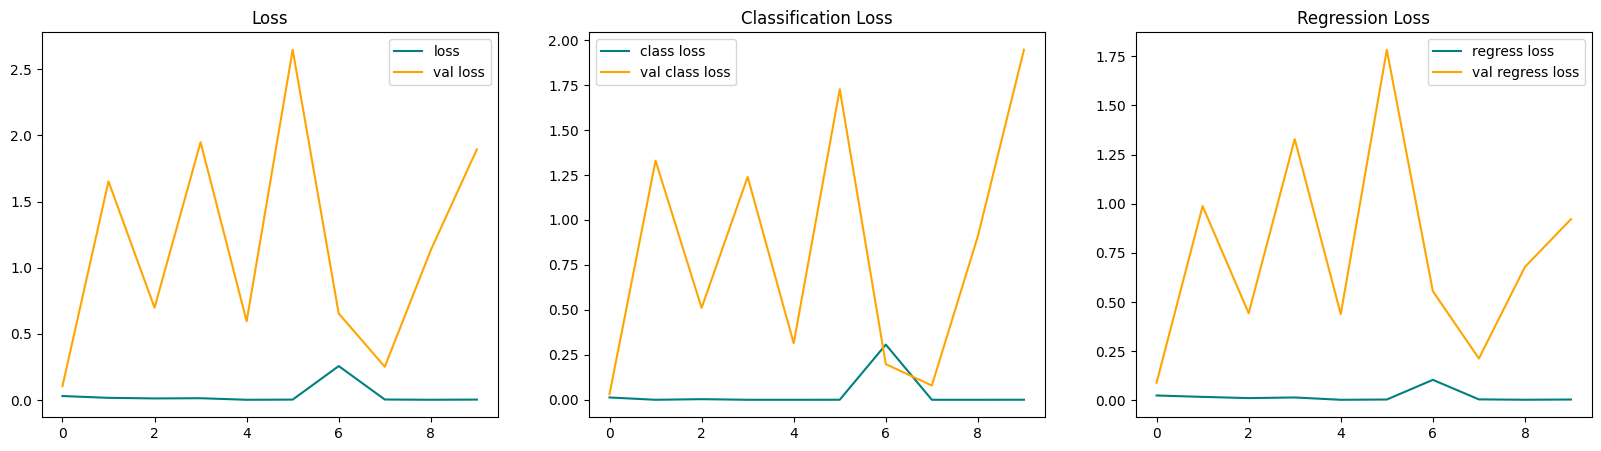

In [132]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

1/1 [==============================] - 1s 962ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


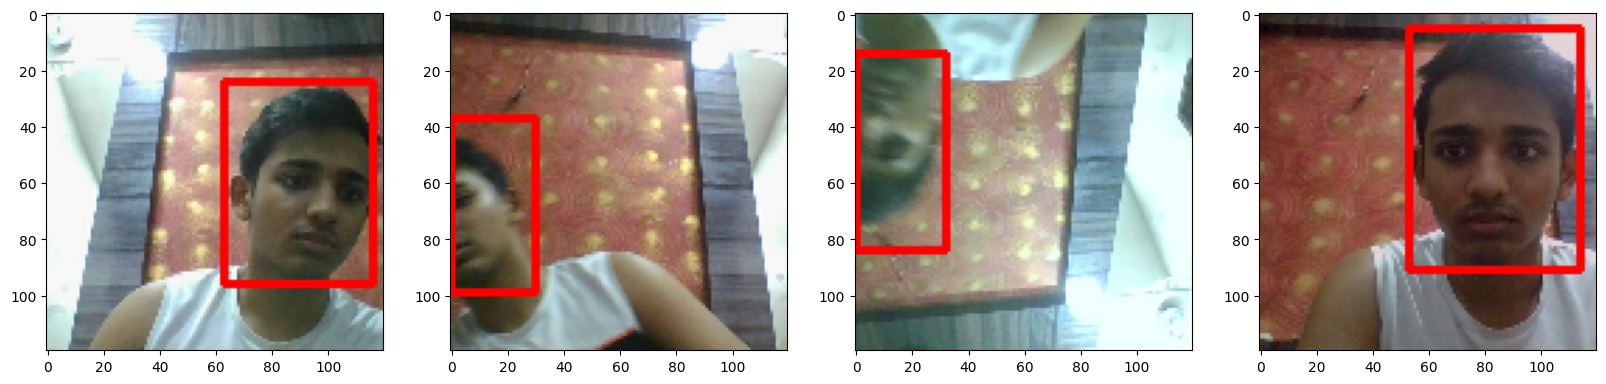

In [133]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [134]:
from tensorflow.keras.models import load_model
facetracker.save('facetracker.h5')
facetracker = load_model('facetracker.h5')

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()